In [1]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import constraint_utils as constraint
from ecpaper_utils import constraint_sensitivity_utils as constraint_sens
from ecpaper_utils import fig_utils as ecfig
from matplotlib.patches import Rectangle

importlib.reload(linfit)
importlib.reload(boot)
importlib.reload(constraint)
importlib.reload(constraint_sens)
importlib.reload(ecfig)

import warnings
warnings.filterwarnings('ignore')

The jet latitude constraint

In [4]:
datdir="/project/cas/islas/python_savs/ecpaper2020/DATASORT/SHJET/"
errordatdir="../ERRORCALC/JLAT/DATA/"

In [5]:
cmip5 = xr.open_dataset(datdir+"jlatcmip5.nc")
cmip6 = xr.open_dataset(datdir+"jlatcmip6.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")
cmip56=xr.concat([cmip5, cmip6], "model")
errorem56 = xr.concat([errorem5, errorem6], "Model")

In [6]:
obsdata =xr.open_dataset(datdir+"jlatobs.nc")
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra

The OLS constraints

In [7]:
cmip56ols_forced, cmip56ols_forcedplusiv = constraint_sens.dotheconstraint_all(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='OLS')

cmip56ols_onlyx = constraint_sens.dotheconstraint_onlyxvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='OLS')

cmip56ols_onlycoefs = constraint_sens.dotheconstraint_onlycoefs(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='OLS')
cmip56ols_onlydelta = constraint_sens.dotheconstraint_onlydelta(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='OLS')
cmip56ols_onlyiv = constraint_sens.dotheconstraint_onlyiv(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='OLS')


Constraining using OLS
Constraining using OLS
Constraining using OLS
Constraining using OLS
Constraining using OLS


In [8]:
cmip56tls_forced, cmip56tls_forcedplusiv = constraint_sens.dotheconstraint_all(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='TLS')

cmip56tls_onlyx = constraint_sens.dotheconstraint_onlyxvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='TLS')

cmip56tls_onlycoefs = constraint_sens.dotheconstraint_onlycoefs(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='TLS')
cmip56tls_onlydelta = constraint_sens.dotheconstraint_onlydelta(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='TLS')
cmip56tls_onlyiv = constraint_sens.dotheconstraint_onlyiv(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='TLS')

Constraining using TLS
Constraining using TLS
Constraining using TLS
Constraining using TLS
Constraining using TLS


In [9]:
cmip56bhm_forced, cmip56bhm_forcedplusiv = constraint_sens.dotheconstraint_all(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

cmip56bhm_onlyx = constraint_sens.dotheconstraint_onlyxvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

cmip56bhm_onlycoefs = constraint_sens.dotheconstraint_onlycoefs(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')
cmip56bhm_onlydelta = constraint_sens.dotheconstraint_onlydelta(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')
cmip56bhm_onlyiv = constraint_sens.dotheconstraint_onlyiv(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using the BHM
Constraining using the BHM
Constraining using the BHM
Constraining using the BHM
Constraining using the BHM


In [10]:
datdir="/project/cas/islas/python_savs/ecpaper2020/DATASORT/VWIND/"
errordatdir="../ERRORCALC/VWIND/DATA/"
cmip5 = xr.open_dataset(datdir+"cmip5vwindindices.nc")
cmip6 = xr.open_dataset(datdir+"cmip6vwindindices.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")
cmip56=xr.concat([cmip5, cmip6], "Model")
errorem56 = xr.concat([errorem5, errorem6], "Model")

In [11]:
obsdata=xr.open_dataset(datdir+"vampobs.nc")
vampobs=np.zeros([4])
vampobs[0]=obsdata.vamp_era5 ; vampobs[1]=obsdata.vamp_erai
vampobs[2]=obsdata.vamp_jra ; vampobs[3]=obsdata.vamp_merra

In [12]:
vcmip56ols_forced, vcmip56ols_forcedplusiv = constraint_sens.dotheconstraint_all(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='OLS')

vcmip56ols_onlyx = constraint_sens.dotheconstraint_onlyxvar(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='OLS')

vcmip56ols_onlycoefs = constraint_sens.dotheconstraint_onlycoefs(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='OLS')
vcmip56ols_onlydelta = constraint_sens.dotheconstraint_onlydelta(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='OLS')
vcmip56ols_onlyiv = constraint_sens.dotheconstraint_onlyiv(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='OLS')

Constraining using OLS
Constraining using OLS
Constraining using OLS
Constraining using OLS
Constraining using OLS


In [13]:
vcmip56tls_forced, vcmip56tls_forcedplusiv = constraint_sens.dotheconstraint_all(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='TLS')

vcmip56tls_onlyx = constraint_sens.dotheconstraint_onlyxvar(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='TLS')

vcmip56tls_onlycoefs = constraint_sens.dotheconstraint_onlycoefs(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='TLS')
vcmip56tls_onlydelta = constraint_sens.dotheconstraint_onlydelta(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='TLS')
vcmip56tls_onlyiv = constraint_sens.dotheconstraint_onlyiv(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='TLS')

Constraining using TLS
Constraining using TLS
Constraining using TLS
Constraining using TLS
Constraining using TLS


In [14]:
vcmip56bhm_forced, vcmip56bhm_forcedplusiv = constraint_sens.dotheconstraint_all(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

vcmip56bhm_onlyx = constraint_sens.dotheconstraint_onlyxvar(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

vcmip56bhm_onlycoefs = constraint_sens.dotheconstraint_onlycoefs(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='BHM')
vcmip56bhm_onlydelta = constraint_sens.dotheconstraint_onlydelta(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='BHM')
vcmip56bhm_onlyiv = constraint_sens.dotheconstraint_onlyiv(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
                                     rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

Constraining using the BHM
Constraining using the BHM
Constraining using the BHM
Constraining using the BHM
Constraining using the BHM


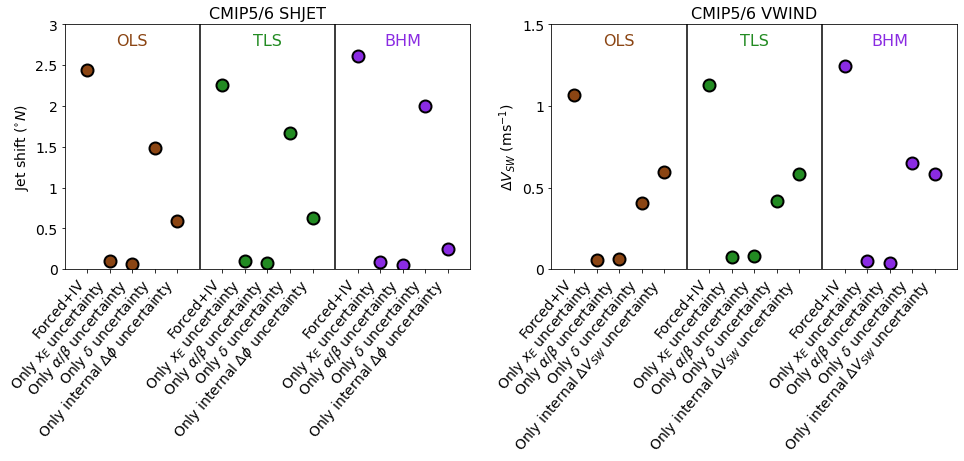

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(16,4.5)

ax[0].set_xlim(0,18)
ax[0].set_xticks([])
ax[0].set_ylim(0,3)

ax[0].set_xticks([1,2,3,4,5,7,8,9,10,11,13,14,15,16,17])
ax[0].set_xticklabels(['Forced+IV','Only $x_{E}$ uncertainty','Only $\\alpha/\\beta$ uncertainty','Only $\delta$ uncertainty','Only internal $\Delta \phi$ uncertainty',
                    'Forced+IV','Only $x_{E}$ uncertainty','Only $\\alpha/\\beta$ uncertainty','Only $\delta$ uncertainty','Only internal $\Delta \phi$ uncertainty',
                     'Forced+IV','Only $x_{E}$ uncertainty','Only $\\alpha/\\beta$ uncertainty','Only $\delta$ uncertainty','Only internal $\Delta \phi$ uncertainty'],fontsize=14,rotation=50,ha='right')

ax[0].set_yticks([0,0.5,1,1.5,2,2.5,3])
ax[0].set_yticklabels(['0','0.5','1','1.5','2','2.5','3'], fontsize=14)
ax[0].set_ylabel('Jet shift ($^{\circ}N$)', fontsize=14)
ax[0].set_title('CMIP5/6 SHJET', fontsize=16)


ax[0].plot(1,cmip56ols_forcedplusiv,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(2,cmip56ols_onlyx,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(3,cmip56ols_onlycoefs,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(4,cmip56ols_onlydelta,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(5,cmip56ols_onlyiv,"o",markerfacecolor="saddlebrown",markeredgecolor='black',markersize=12,markeredgewidth=2)


ax[0].plot(7,cmip56tls_forcedplusiv,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(8,cmip56tls_onlyx,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(9,cmip56tls_onlycoefs,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(10,cmip56tls_onlydelta,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(11,cmip56tls_onlyiv,"o",markerfacecolor="forestgreen",markeredgecolor='black',markersize=12,markeredgewidth=2)

ax[0].plot(13,cmip56bhm_forcedplusiv,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(14,cmip56bhm_onlyx,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(15,cmip56bhm_onlycoefs,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(16,cmip56bhm_onlydelta,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[0].plot(17,cmip56bhm_onlyiv,"o",markerfacecolor="blueviolet",markeredgecolor='black',markersize=12,markeredgewidth=2)


ax[0].plot([6,6],[0,3], color='black')
ax[0].plot([12,12],[0,3], color='black')
ax[0].text(3, 2.8, 'OLS', fontsize=16, color='saddlebrown', horizontalalignment='center', verticalalignment='center')
ax[0].text(9, 2.8, 'TLS', fontsize=16, color='forestgreen', horizontalalignment='center', verticalalignment='center')
ax[0].text(15, 2.8, 'BHM', fontsize=16, color='blueviolet', horizontalalignment='center', verticalalignment='center')



ax[1].set_xlim(0,18)
ax[1].set_xticks([])
ax[1].set_ylim(0,1.5)

ax[1].set_xticks([1,2,3,4,5,7,8,9,10,11,13,14,15,16,17])
ax[1].set_xticklabels(['Forced+IV','Only $x_{E}$ uncertainty','Only $\\alpha/\\beta$ uncertainty','Only $\delta$ uncertainty','Only internal $\Delta V_{SW}$ uncertainty',
                    'Forced+IV','Only $x_{E}$ uncertainty','Only $\\alpha/\\beta$ uncertainty','Only $\delta$ uncertainty','Only internal $\Delta V_{SW}$ uncertainty',
                     'Forced+IV','Only $x_{E}$ uncertainty','Only $\\alpha/\\beta$ uncertainty','Only $\delta$ uncertainty','Only internal $\Delta V_{SW}$ uncertainty'],fontsize=14,rotation=50,ha='right')

ax[1].set_yticks([0,0.5,1,1.5])
ax[1].set_yticklabels(['0','0.5','1','1.5'], fontsize=14)
ax[1].set_ylabel('$\Delta V_{SW}$ (ms$^{-1}$)', fontsize=14)
ax[1].set_title('CMIP5/6 VWIND', fontsize=16)


ax[1].plot(1,vcmip56ols_forcedplusiv,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(2,vcmip56ols_onlyx,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(3,vcmip56ols_onlycoefs,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(4,vcmip56ols_onlydelta,"o",markerfacecolor="saddlebrown",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(5,vcmip56ols_onlyiv,"o",markerfacecolor="saddlebrown",markeredgecolor='black',markersize=12,markeredgewidth=2)


ax[1].plot(7,vcmip56tls_forcedplusiv,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(8,vcmip56tls_onlyx,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(9,vcmip56tls_onlycoefs,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(10,vcmip56tls_onlydelta,"o",markerfacecolor="forestgreen",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(11,vcmip56tls_onlyiv,"o",markerfacecolor="forestgreen",markeredgecolor='black',markersize=12,markeredgewidth=2)

ax[1].plot(13,vcmip56bhm_forcedplusiv,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(14,vcmip56bhm_onlyx,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(15,vcmip56bhm_onlycoefs,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(16,vcmip56bhm_onlydelta,"o",markerfacecolor="blueviolet",markeredgecolor='black', markersize=12, markeredgewidth=2)
ax[1].plot(17,vcmip56bhm_onlyiv,"o",markerfacecolor="blueviolet",markeredgecolor='black',markersize=12,markeredgewidth=2)


ax[1].plot([6,6],[0,3], color='black')
ax[1].plot([12,12],[0,3], color='black')
ax[1].text(3, 1.4, 'OLS', fontsize=16, color='saddlebrown', horizontalalignment='center', verticalalignment='center')
ax[1].text(9, 1.4, 'TLS', fontsize=16, color='forestgreen', horizontalalignment='center', verticalalignment='center')
ax[1].text(15, 1.4, 'BHM', fontsize=16, color='blueviolet', horizontalalignment='center', verticalalignment='center')


fig.savefig('figs7.pdf', facecolor='white', bbox_inches='tight')

